In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("sentiment_tweets3.csv",encoding= 'unicode_escape')

In [4]:
data

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


## Changing the column names 

In [5]:
data.rename(columns={'message to examine': 'message', 'label (depression result)': 'label'}, inplace=True)
data.drop(['Index'],inplace=True,axis = 1)
data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## EDA

In [6]:
data.label.value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [7]:
data.describe()

,label
count,10314.000000
mean,0.224355
std,0.417177
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Data Cleaning

#### Remove short forms of the words in documents

In [8]:
def remove_shortform_specialchar(text):
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        return text

#### Removing Urls

In [9]:
import re
def remove_url(x):
    x = x.lower()
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    x = pattern.sub('', x)
    return x

#### Removing HTML Tags

In [10]:
from bs4 import BeautifulSoup
def remove_html(x):
  soup = BeautifulSoup(x,'lxml')
  return soup.get_text()

#### Removing Emoji

In [11]:
def remove_emoji(x):        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        x = emoji.sub(r'', x)
        return x

#### Removing Special Characters 


In [12]:
def remove_special_char(text):
  text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
  return text

#### Removing Brackets 

In [13]:
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

### Stopwords Removal 

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
exceptionStopWords = {
    'again',
    'against',
    'ain',
    'almost',
    'among',
    'amongst',
    'amount',
    'anyhow',
    'anyway',
    'aren',
    "aren't",
    'below',
    'bottom',
    'but',
    'cannot',
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'don',
    "don't",
    'done',
    'down',
    'except',
    'few',
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'however',
    'isn',
    "isn't",
    'least',
    'mightn',
    "mightn't",
    'must',
    'mustn',
    "mustn't",
    'needn',
    "needn't",
    'neither',
    'never',
    'nevertheless',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'not',
    'nothing',
    'should',
    "should've",
    'shouldn',
    "shouldn't",
    'too',
    'top',
    'up',
    'wasn',
    "wasn't",
    'well',
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't",
}
finalstop = stop_words-exceptionStopWords


# def remove_stopwords(reviews):
#     for review in reviews:
#       words = [w for w in review if not w in finalstop]
#       words = ' '.join(words)

In [16]:
def remove_stopwords(reviews):
    for review in reviews:
      words = [w for w in review if not w in finalstop]
      words = ' '.join(words)

In [17]:
reviews = data['message']
reviews

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat Need to send 'em to my accountant tomo...
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder
                               ...                        
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message, Length: 10314, dtype: object

#### Data Cleaning Pipeline

In [18]:
review_list = []
for review in reviews:
  review = remove_html(str(review))
  review = remove_url(review)
  review = str(review).lower()
  review = remove_special_char(str(review))
  review = remove_shortform_specialchar(review)
  review = remove_emoji(review)
  review = remove_square_brackets(review)
  review_list.append(review)

<ipython-input-10-e37717150173>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(x,'lxml')


In [19]:
data['clean_text'] = pd.Series(review_list) 

In [20]:
data

,message,label,clean_text
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss him...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need to send 'em to my accountant tomor...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace myspacecomlookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...
10310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyon...


#### Plotting most frequent words of the corpus 

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

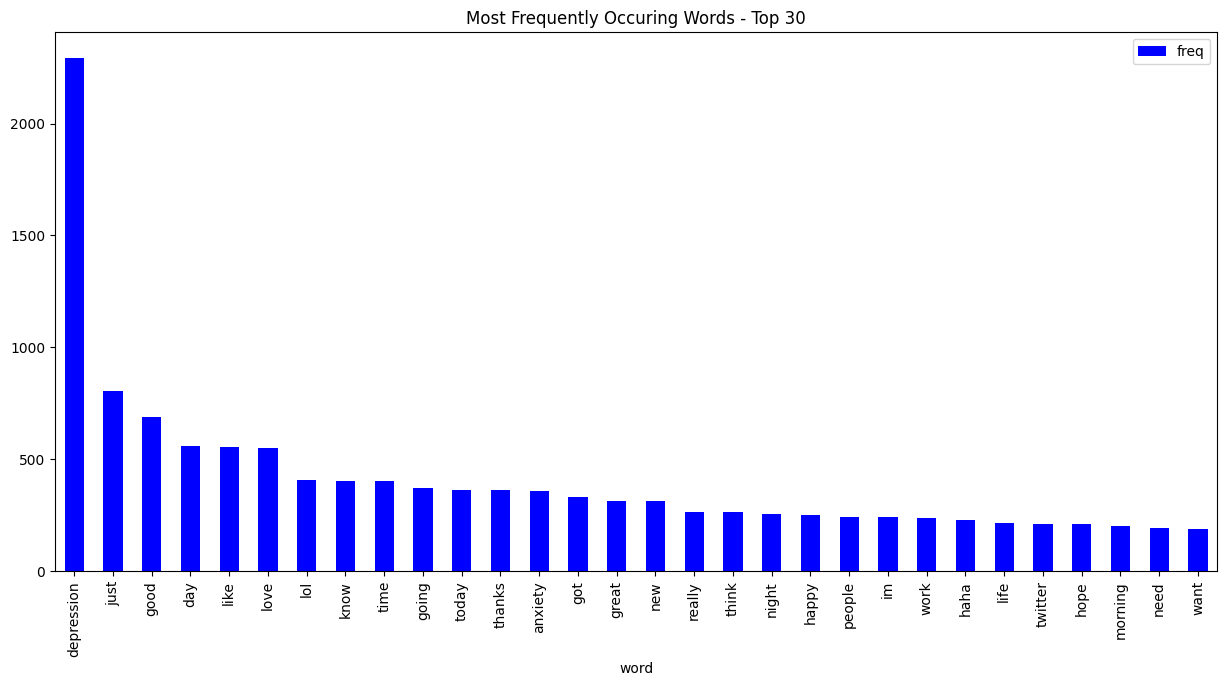

In [21]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.clean_text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

#### Wordcloud of most important words 

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

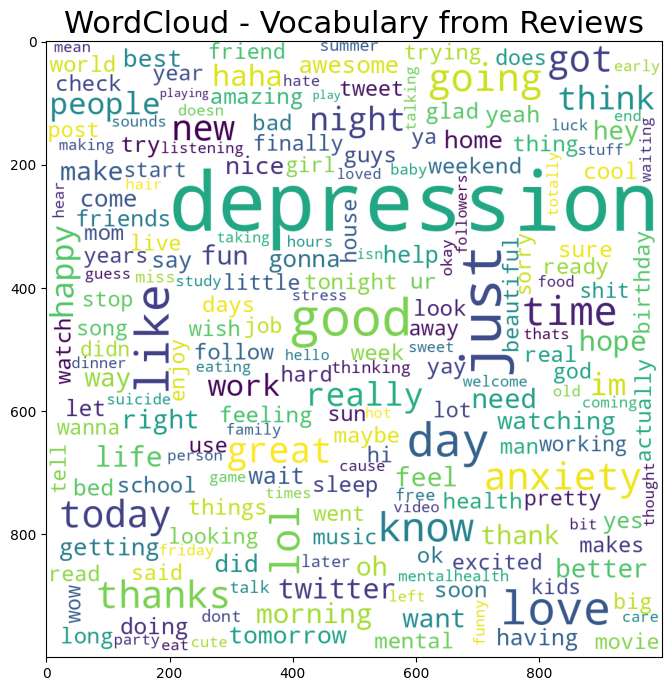

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

#### Neutral Words on Wordcloud


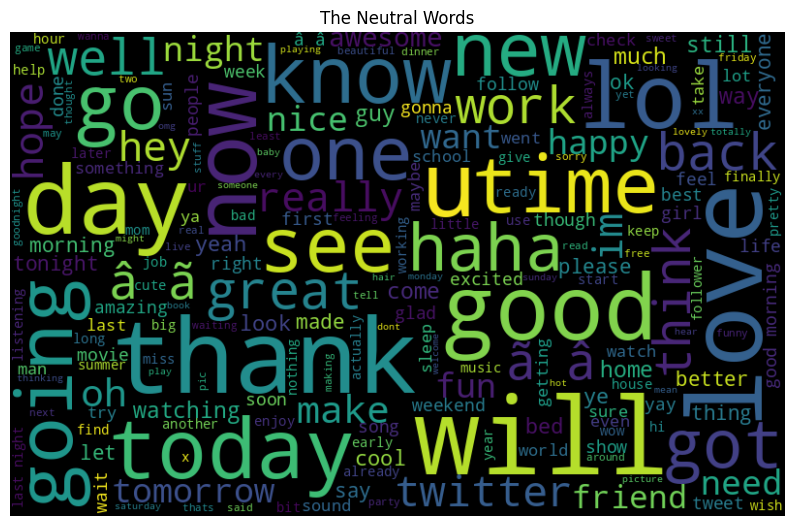

In [23]:
normal_words =' '.join([text for text in data['clean_text'][data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


#### Wordcloud of Negative Words 

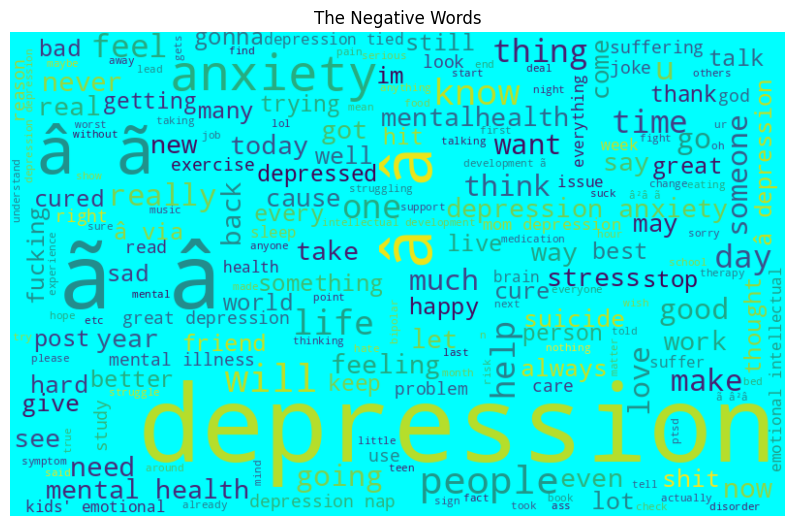

In [24]:
negative_words =' '.join([text for text in data['clean_text'][data['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

#### Extracting words with hashtag

In [25]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

#### Extracting words with hashtag in positive and negative category 

In [26]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(data['message'][data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['message'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
     

#### Plotting 

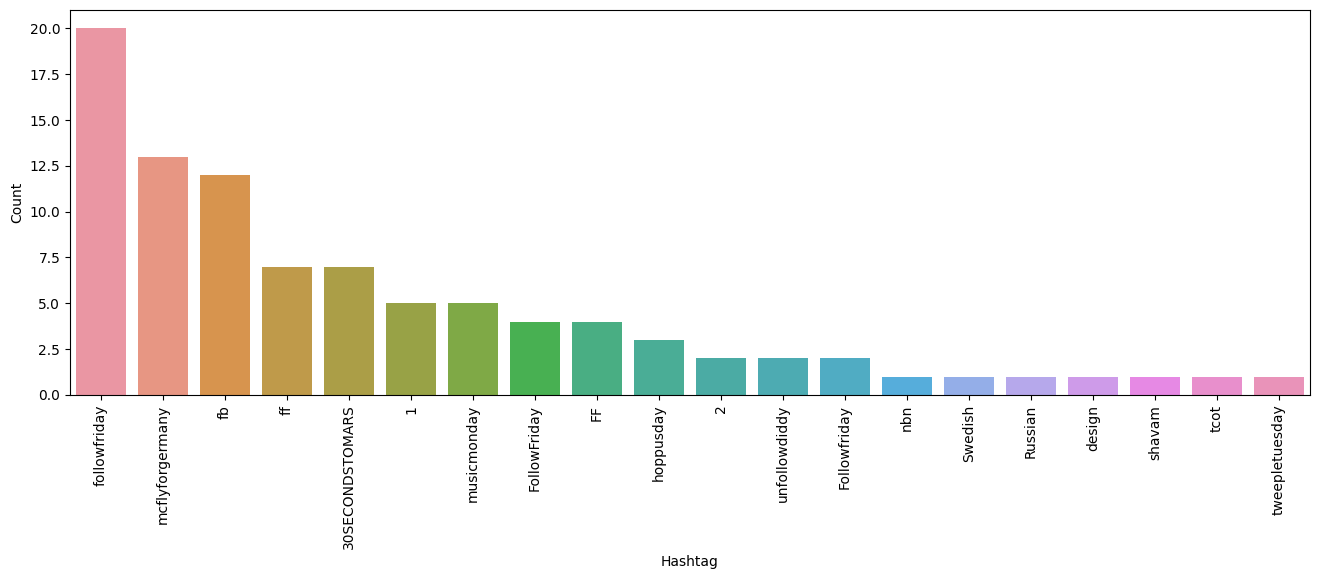

In [27]:
import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set(ylabel = 'Count')
plt.show()


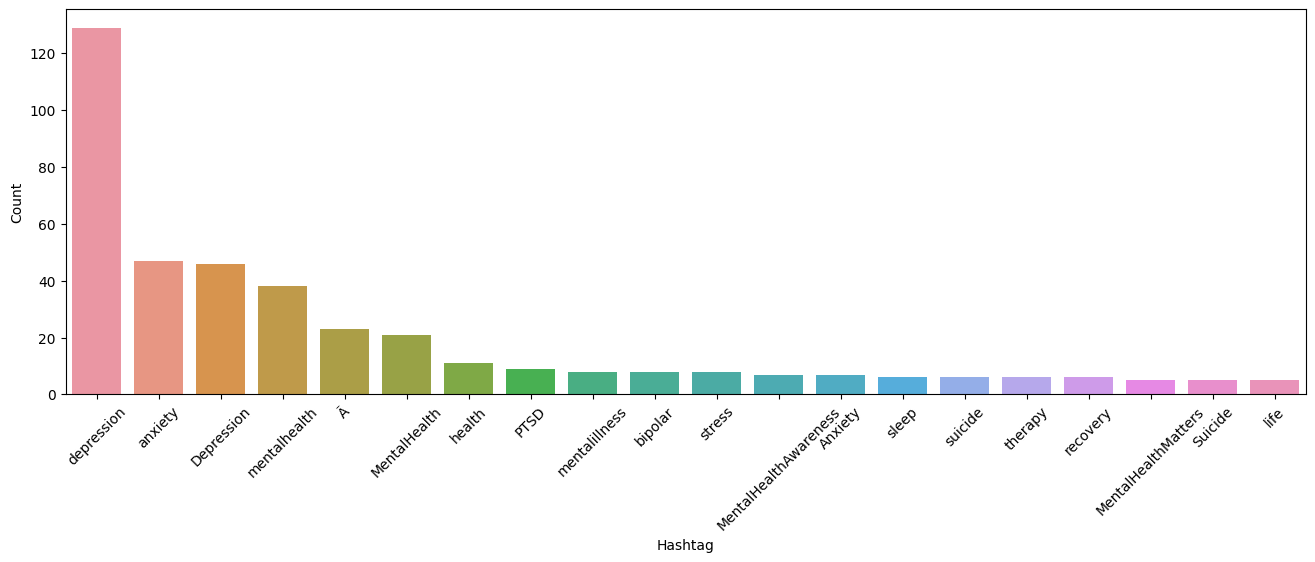

In [28]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.set(ylabel = 'Count')
plt.show()

In [29]:
# tokenizing the words present in the training set
tokenized_tweet = data['clean_text'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            # size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['message']), epochs=20)
     

(2069149, 3096280)

In [30]:
!pip install gensim.models.doc2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gensim.models.doc2vec (from versions: none)
ERROR: No matching distribution found for gensim.models.doc2vec


In [31]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [32]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['just', 'had', 'a', 'real', 'good', 'moment', 'i', 'missssssssss', 'him', 'so', 'much'], tags=['tweet_0']),
 TaggedDocument(words=['is', 'reading', 'manga'], tags=['tweet_1']),
 TaggedDocument(words=['comeagainjen'], tags=['tweet_2']),
 TaggedDocument(words=['lapcat', 'need', 'to', 'send', "'em", 'to', 'my', 'accountant', 'tomorrow', 'oddly', 'i', "wasn't", 'even', 'referring', 'to', 'my', 'taxes', 'those', 'are', 'supporting', 'evidence', 'though'], tags=['tweet_3']),
 TaggedDocument(words=['add', 'me', 'on', 'myspace', 'myspacecomlookthunder'], tags=['tweet_4']),
 TaggedDocument(words=['so', 'sleepy', 'good', 'times', 'tonight', 'though'], tags=['tweet_5'])]

In [33]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
data['clean_text']

0        just had a real good moment i missssssssss him...
1                                       is reading manga  
2                                         comeagainjen    
3        lapcat need to send 'em to my accountant tomor...
4                 add me on myspace  myspacecomlookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray shows promise against dep...
10312    dont mistake a bad day with depression everyon...
10313                                                    0
Name: clean_text, Length: 10314, dtype: object

#### Counter Vectoriser for vectorising the data 

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(data['clean_text']).toarray()
y = data.iloc[:, 1]

print(x.shape)
print(y.shape)

(10314, 2500)
(10314,)


#### Splitting the data into validation and training dataset

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7735, 2500)
(2579, 2500)
(7735,)
(2579,)


#### Scaling the dataset 

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Building 

#### RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.999224305106658
Validation Accuracy : 0.9914695618456766
F1 score : 0.9802867383512546
[[2010    1]
 [  21  547]]


#### LOGISTIC REGRESSION 

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9990950226244344
Validation Accuracy : 0.9759596742923614
f1 score : 0.9439421338155515
[[1995   16]
 [  46  522]]


#### DECISION TREE CLASSFIER 

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy : 0.999224305106658
Validation Accuracy : 0.9899185730903451
f1 score : 0.9769911504424779
[[2001   10]
 [  16  552]]


#### SUPPORT VECTOR MACHINE

In [43]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score( y_test, y_pred))

# confusion matrix
cm = confusion_matrix( y_test, y_pred)
print(cm)

     

Training Accuracy : 0.9972850678733032
Validation Accuracy : 0.921675067855758
f1 score : 0.7873684210526315
[[2003    8]
 [ 194  374]]


#### XGBOOST CLASSIFIER

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9957336780866193
Validation Accuracy : 0.9918573090345095
f1 score : 0.981199641897941
[[2010    1]
 [  20  548]]


## OBSERVATIONS:
- XGBOOST CLASSIFIER GAVE THE BEST RESULT WITH F1 SCORE OF 98% WITH CBOW BASED SENTIMENT ANALYSIS 